## NY Times APIs

_What are APIs?_

Structured ways people can give you their data.

_Why?_

Usually because they want to help web/mobile developers attract more users to their service.

They want developers to build apps to drive more eyeballs to their service.

![](https://raw.github.com/nealcaren/workshop_2014/master/notebooks/images/times_inequality.png)

No love with the scrape!!!

![](https://raw.github.com/nealcaren/workshop_2014/master/notebooks/images/no_luck.png)

In [1]:
import requests

Sign up to be a [developer](http://developer.nytimes.com) with the New York Times and get your own API key.

In [2]:
my_times_api_key = 'acPbWSkxHHzkgAvMaeOYCbsYytPFlEWY'

APIs can be accessed like a normal URL, but they are often very long, complicated, and involve variables you want to change. For example, you can get the information about the first 10 articles published in the New York Times that used the word "Canada" with:

[http://api.nytimes.com/svc/search/v2/articlesearch.json?sort=newest&begin_date=20180101&end_date=20180930&api-key=d20bc9ac37156ecc4cb3d78eb956201d%3A0%3A54059647&q=Canada&page=0](http://api.nytimes.com/svc/search/v2/articlesearch.json?sort=newest&begin_date=20180101&end_date=20180930&api-key=d20bc9ac37156ecc4cb3d78eb956201d%3A0%3A54059647&q=Canada&page=0)

Requests allows you to do this in a more civilized way.

In [4]:
payload = {'q'         : 'Canada', 
           'begin_date': '20200101' ,
           'end_date'  : '20201231',
           'api-key'   :  my_times_api_key,
           'sort'      : 'oldest' ,
           'offset'    :  20}

base_url = 'http://api.nytimes.com/svc/search/v2/articlesearch.json?'

In [5]:
r = requests.get(base_url, params = payload)

#r.url

In [6]:
r.text

'{"status":"OK","copyright":"Copyright (c) 2021 The New York Times Company. All Rights Reserved.","response":{"docs":[{"abstract":"Bush fire season is nothing new to Australians, but this summer has been calamitous — and it’s far from over.","web_url":"https://www.nytimes.com/2020/01/01/world/australia/fires.html","snippet":"Bush fire season is nothing new to Australians, but this summer has been calamitous — and it’s far from over.","lead_paragraph":"This fire season has been one of the worst in Australia’s history, with at least 15 people killed, hundreds of homes destroyed and millions of acres burned. And summer is far from over.","source":"The New York Times","multimedia":[{"rank":0,"subtype":"xlarge","caption":null,"credit":null,"type":"image","url":"images/2020/01/01/world/01oz-fire-explainer-promo/merlin_166540014_46f37cfd-add0-405a-a022-ccb0e56992e6-articleLarge.jpg","height":400,"width":600,"legacy":{"xlarge":"images/2020/01/01/world/01oz-fire-explainer-promo/merlin_166540014

In [7]:
r.json()

{'status': 'OK',
 'copyright': 'Copyright (c) 2021 The New York Times Company. All Rights Reserved.',
 'response': {'docs': [{'abstract': 'Bush fire season is nothing new to Australians, but this summer has been calamitous — and it’s far from over.',
    'web_url': 'https://www.nytimes.com/2020/01/01/world/australia/fires.html',
    'snippet': 'Bush fire season is nothing new to Australians, but this summer has been calamitous — and it’s far from over.',
    'lead_paragraph': 'This fire season has been one of the worst in Australia’s history, with at least 15 people killed, hundreds of homes destroyed and millions of acres burned. And summer is far from over.',
    'source': 'The New York Times',
    'multimedia': [{'rank': 0,
      'subtype': 'xlarge',
      'caption': None,
      'credit': None,
      'type': 'image',
      'url': 'images/2020/01/01/world/01oz-fire-explainer-promo/merlin_166540014_46f37cfd-add0-405a-a022-ccb0e56992e6-articleLarge.jpg',
      'height': 400,
      'wid

In [8]:
json = r.json()


In [9]:
json.keys()

dict_keys(['status', 'copyright', 'response'])

In [10]:
json['status']

'OK'

Output from `json['response']` ommitted because it was really long.

In [11]:
json['response']['docs']

[{'abstract': 'Bush fire season is nothing new to Australians, but this summer has been calamitous — and it’s far from over.',
  'web_url': 'https://www.nytimes.com/2020/01/01/world/australia/fires.html',
  'snippet': 'Bush fire season is nothing new to Australians, but this summer has been calamitous — and it’s far from over.',
  'lead_paragraph': 'This fire season has been one of the worst in Australia’s history, with at least 15 people killed, hundreds of homes destroyed and millions of acres burned. And summer is far from over.',
  'source': 'The New York Times',
  'multimedia': [{'rank': 0,
    'subtype': 'xlarge',
    'caption': None,
    'credit': None,
    'type': 'image',
    'url': 'images/2020/01/01/world/01oz-fire-explainer-promo/merlin_166540014_46f37cfd-add0-405a-a022-ccb0e56992e6-articleLarge.jpg',
    'height': 400,
    'width': 600,
    'legacy': {'xlarge': 'images/2020/01/01/world/01oz-fire-explainer-promo/merlin_166540014_46f37cfd-add0-405a-a022-ccb0e56992e6-articleL

In [12]:
json['response']['meta']['hits']

2908

In [18]:
from time import sleep

base_url = 'http://api.nytimes.com/svc/search/v2/articlesearch.json?'

payload = { 'q'         : 'Canada', 
            'api-key'   :  my_times_api_key,
            'sort'      : 'newest' ,
            'page'      :  0}
    
years = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
counts = []
for year in years: 
    year_string = str(year)
    payload['begin_date'] = year_string + '0101'
    payload['end_date']   = year_string + '1231'
    r = requests.get(base_url, params = payload)
    json = r.json()
    count  = json['response']['meta']['hits']
    print(count)
    counts.append(count)
    sleep(1.5)   

3940
3240
3320
2936
3130
2867
2718
2866
3392
3132
2908


This can be plotted in Python.

Populating the interactive namespace from numpy and matplotlib


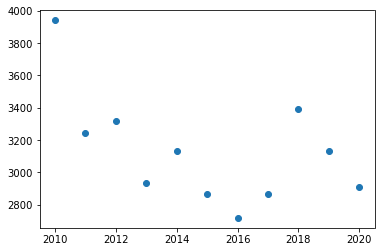

In [19]:
%pylab inline
import matplotlib.pyplot as plt

plt.scatter(years,counts)
plt.ticklabel_format(useOffset=False)

Your turn. Modify the script below to output a csv with the monthly total of "Canada" articles. For an extra challenge, add an additional column with the count of the number of "Canada trade" articles.